# Criação dos registos das tabelas do Mercado Empodera

---

Utilizando a biblioteca faker para gerar os registros fakes

In [24]:
!pip install faker
!pip install duckdb


In [40]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
from faker import Faker
import random
import matplotlib.pyplot as plt

In [ ]:

# Initialize Faker
fake = Faker('pt_BR')

# Lista das lojas da Rede Empodera
lojas_empodera = ['Empodera Fortaleza', 'Empodera Sobral', 'Empodera Juazeiro']

# ---------- TABELA DE CLIENTES ----------
def gerar_tabela_clientes(n=100):
    return pd.DataFrame({
        'CPF': [fake.unique.cpf() for _ in range(n)],
        'NOME': [fake.name() for _ in range(n)],
        'ENDERECO': [fake.street_address() for _ in range(n)],
        'COMPLEMENTO': [fake.building_number() for _ in range(n)],
        'BAIRRO': [fake.bairro() for _ in range(n)],
        'CIDADE': [fake.city() for _ in range(n)],
        'ESTADO': ['CE' for _ in range(n)],
        'CEP': [fake.postcode() for _ in range(n)],
        'DATA DE NASCIMENTO': [fake.date_of_birth(minimum_age=18, maximum_age=90) for _ in range(n)],
        'IDADE': [random.randint(18, 90) for _ in range(n)],
        'SEXO': [random.choice(['M', 'F']) for _ in range(n)],
        'LIMITE DE CREDITO': [round(random.uniform(500.0, 5000.0), 2) for _ in range(n)],
        'VOLUME DE COMPRA': [round(random.uniform(100.0, 10000.0), 2) for _ in range(n)],
        'PRIMEIRA COMPRA': [random.choice([True, False]) for _ in range(n)]
    })

# ---------- TABELA DE VENDEDORES ----------
def gerar_tabela_vendedores(n=20):
    return pd.DataFrame({
        'MATRICULA': [f'VEN{str(i).zfill(3)}' for i in range(n)],
        'NOME': [fake.name() for _ in range(n)],
        'PERCENTUAL COMISSAO': [round(random.uniform(0.01, 0.10), 2) for _ in range(n)],
        'DATA DE ADMISSAO': [fake.date_between(start_date='-10y', end_date='-1y') for _ in range(n)],
        'FERIAS': [random.choice([True, False]) for _ in range(n)]
    })

# ---------- TABELA DE PRODUTOS ----------
def gerar_tabela_produtos(n=50):
    return pd.DataFrame({
        'CODIGO DO PRODUTO': [f'PROD{str(i).zfill(3)}' for i in range(n)],
        'NOME DO PRODUTO': [fake.word() for _ in range(n)],
        'EMBALAGEM': [random.choice(['Caixa', 'Pacote', 'Garrafa', 'Lata']) for _ in range(n)],
        'TAMANHO': [random.choice(['250ml', '500ml', '1L', '2L']) for _ in range(n)],
        'SABOR': [random.choice(['Morango', 'Chocolate', 'Baunilha', 'Natural', 'Uva']) for _ in range(n)],
        'PRECO DE LISTA': [round(random.uniform(5.0, 50.0), 2) for _ in range(n)]
    })

# ---------- GERAÇÃO DAS TABELAS AUXILIARES ----------
clientes_df = gerar_tabela_clientes()
vendedores_df = gerar_tabela_vendedores()
produtos_df = gerar_tabela_produtos()

# ---------- TABELA DE NOTAS FISCAIS ----------
def gerar_tabela_notas_fiscais(n=50):
    return pd.DataFrame([{
        'CPF': random.choice(clientes_df['CPF']),
        'MATRICULA': random.choice(vendedores_df['MATRICULA']),
        'DATA': fake.date_between(start_date='-1y', end_date='today'),
        'NUMERO': f'NF{str(i).zfill(4)}',
        'IMPOSTO': round(random.uniform(5.0, 20.0), 2),
        'REDE': random.choice(lojas_empodera)
    } for i in range(n)])

notas_df = gerar_tabela_notas_fiscais()

# ---------- TABELA DE ITENS NOTAS FISCAIS ----------
def gerar_tabela_itens_notas_fiscais(n=100):
    return pd.DataFrame([{
        'NUMERO': random.choice(notas_df['NUMERO']),
        'CODIGO DO PRODUTO': random.choice(produtos_df['CODIGO DO PRODUTO']),
        'QUANTIDADE': random.randint(1, 10),
        'PRECO': round(random.uniform(2.0, 15.0), 2),
        'REDE': random.choice(lojas_empodera)
    } for _ in range(n)])

itens_df = gerar_tabela_itens_notas_fiscais()

In [ ]:
clientes_df

In [53]:
vendedores_df

,MATRICULA,NOME,PERCENTUAL COMISSAO,DATA DE ADMISSAO,FERIAS
0,VEN000,Ana Sophia Caldeira,0.04,2019-01-19,False
1,VEN001,Srta. Isadora Câmara,0.05,2016-07-16,True
2,VEN002,Letícia Farias,0.01,2022-04-01,True
3,VEN003,Dr. Luiz Henrique Cunha,0.08,2019-10-22,True
4,VEN004,Dr. João Pedro Martins,0.06,2017-01-04,False
5,VEN005,Sra. Maria Helena da Cruz,0.08,2018-08-30,True
6,VEN006,Joaquim Abreu,0.10,2017-01-11,True
7,VEN007,Luigi Fogaça,0.06,2017-03-07,True
8,VEN008,Rodrigo Duarte,0.01,2016-11-28,True
9,VEN009,Esther Pereira,0.09,2018-04-02,True


In [ ]:
produtos_df

In [52]:
notas_df

,CPF,MATRICULA,DATA,NUMERO,IMPOSTO,REDE
0,025.817.936-86,VEN004,2024-06-23,NF0000,10.81,Empodera Juazeiro
1,548.369.107-57,VEN017,2025-01-25,NF0001,10.88,Empodera Fortaleza
2,056.948.213-51,VEN019,2024-06-14,NF0002,5.55,Empodera Fortaleza
3,874.519.062-30,VEN012,2024-08-16,NF0003,15.43,Empodera Fortaleza
4,504.782.619-85,VEN000,2025-02-16,NF0004,9.57,Empodera Juazeiro
5,618.279.503-40,VEN004,2025-04-13,NF0005,8.16,Empodera Fortaleza
6,056.948.213-51,VEN008,2024-08-16,NF0006,16.46,Empodera Sobral
7,836.905.714-48,VEN016,2025-04-17,NF0007,7.25,Empodera Sobral
8,504.782.619-85,VEN005,2025-02-25,NF0008,15.13,Empodera Juazeiro
9,723.981.640-04,VEN001,2024-10-27,NF0009,11.15,Empodera Sobral


In [ ]:
itens_df

In [ ]:
clientes_df.to_csv('clientes.csv', index=False, encoding='utf-8-sig')
vendedores_df.to_csv('vendedores.csv', index=False, encoding='utf-8-sig')
produtos_df.to_csv('produtos.csv', index=False, encoding='utf-8-sig')
notas_df.to_csv('notas_fiscais.csv', index=False, encoding='utf-8-sig')
itens_df.to_csv('itens_notas_fiscais.csv', index=False, encoding='utf-8-sig')

## Utilizando Python e SQL no etl

1 - Extrair os dados ✅\
2 - Transformar "observar qual tipo de arquivo" ✅\
3 - Renomear as colunas dos dataset\
3 - Observar se é preciso excluír algumas linha ou usar a primeira linha como cabeçalho\
4 - Limpeza dos dados\
5 - Verificar a tipagem dos dados\
6 - Traduzir a coluna de order_status e payment_type\
7 - Transforma o Json em um formato tabular e pivotar a tabela

## Analises a estrutura dos Dataframes

In [21]:
# Verificando número de colunas, nomes das colunas e número de linhas

# Lista dos DataFrames
datasets = [
    clientes_df,
    vendedores_df,
    produtos_df,
    notas_df,
    itens_df
]

# Títulos correspondentes aos datasets
titles = [
    "clientes",
    "vendedores",
    "produtos",
    "notas",
    "itens",

]

# Criando um DataFrame para armazenar as informações
info_df = pd.DataFrame({})

# Nome dos datasets
info_df['dataset'] = titles

# Número de colunas em cada dataset
info_df['Num Colunas'] = [len(df.columns) for df in datasets]

# Lista de nomes das colunas (concatenadas por vírgula)
info_df['Nome das Colunas'] = [', '.join(list(df.columns)) for df in datasets]

# Número de linhas (registros) em cada dataset
info_df['Num de Linhas'] = [len(df) for df in datasets]

info_df = pd.DataFrame({})
info_df['dataset'] = titles
info_df['Num Colunas'] = [len(df.columns) for df in datasets]
info_df['Nome das Colunas'] = [', '.join(list(df.columns)) for df in datasets]
info_df['Num de Linhas'] = [len(df) for df in datasets]
info_df

,dataset,Num Colunas,Nome das Colunas,Num de Linhas
0,clientes,14,"CPF, NOME, ENDERECO, COMPLEMENTO, BAIRRO, CIDA...",100
1,vendedores,5,"MATRICULA, NOME, PERCENTUAL COMISSAO, DATA DE ...",20
2,produtos,6,"CODIGO DO PRODUTO, NOME DO PRODUTO, EMBALAGEM,...",50
3,notas,6,"CPF, MATRICULA, DATA, NUMERO, IMPOSTO, REDE",50
4,itens,5,"NUMERO, CODIGO DO PRODUTO, QUANTIDADE, PRECO, ...",100


In [22]:
datasets = [
    clientes_df,
    vendedores_df,
    produtos_df,
    notas_df,
    itens_df
]


titles = [
    "clientes",
    "vendedores",
    "produtos",
    "notas",
    "itens",

]



info_df_n = pd.DataFrame({},)

info_df_n['dataset']= titles

# criando uma coluna com os nomes das colunas no dataset
info_df_n['Colunas'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]

# criando o número total de colunas no dataset
info_df_n['Num das Colunas']= [df.shape[1] for df in datasets]

# contando o total de valores nulos
info_df_n['Nulos']= [df.isnull().sum().sum() for df in datasets]

# criando o número total de colunas no dataset que contêm valores nulos
info_df_n['Num de colunas com nulos']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

# criando uma coluna com os nomes das colunas no dataset que contêm valores nulos
info_df_n['Nome das Colunas com Nulos'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

info_df_n

,dataset,Colunas,Num das Colunas,Nulos,Num de colunas com nulos,Nome das Colunas com Nulos
0,clientes,"CPF, NOME, ENDERECO, COMPLEMENTO, BAIRRO, CIDA...",14,0,0,
1,vendedores,"MATRICULA, NOME, PERCENTUAL COMISSAO, DATA DE ...",5,0,0,
2,produtos,"CODIGO DO PRODUTO, NOME DO PRODUTO, EMBALAGEM,...",6,0,0,
3,notas,"CPF, MATRICULA, DATA, NUMERO, IMPOSTO, REDE",6,0,0,
4,itens,"NUMERO, CODIGO DO PRODUTO, QUANTIDADE, PRECO, ...",5,0,0,


## Fazer um merge dos DataFrames para realizar análises analíticas

In [23]:
# 1. Itens + Produtos
itens_produtos = itens_df.merge(produtos_df, on='CODIGO DO PRODUTO', how='left')

# 2. + Notas Fiscais
itens_produtos_notas = itens_produtos.merge(notas_df, on='NUMERO', how='left', suffixes=('', '_NOTA'))

# 3. + Clientes
itens_completo = itens_produtos_notas.merge(clientes_df, on='CPF', how='left', suffixes=('', '_CLIENTE'))

# 4. + Vendedores
itens_completo = itens_completo.merge(vendedores_df, on='MATRICULA', how='left', suffixes=('', '_VENDEDOR'))

# Exibir amostra
display(itens_completo.head())


,NUMERO,CODIGO DO PRODUTO,QUANTIDADE,PRECO,REDE,NOME DO PRODUTO,EMBALAGEM,TAMANHO,SABOR,PRECO DE LISTA,...,DATA DE NASCIMENTO,IDADE,SEXO,LIMITE DE CREDITO,VOLUME DE COMPRA,PRIMEIRA COMPRA,NOME_VENDEDOR,PERCENTUAL COMISSAO,DATA DE ADMISSAO,FERIAS
0,NF0045,PROD005,3,5.89,Empodera Fortaleza,deleniti,Garrafa,1L,Baunilha,9.22,...,2005-10-14,63,M,2152.43,5499.34,False,Dr. Luiz Henrique Cunha,0.08,2019-10-22,True
1,NF0025,PROD037,8,10.84,Empodera Juazeiro,odit,Pacote,250ml,Morango,46.02,...,1943-03-05,31,M,4873.98,8630.59,False,Letícia Farias,0.01,2022-04-01,True
2,NF0016,PROD007,10,5.85,Empodera Juazeiro,sequi,Lata,1L,Uva,17.15,...,1995-05-05,52,M,1325.71,430.17,True,Benício Sá,0.09,2015-10-08,True
3,NF0001,PROD037,10,7.58,Empodera Fortaleza,odit,Pacote,250ml,Morango,46.02,...,1994-05-22,70,F,765.99,4609.36,True,Benício Sá,0.09,2015-10-08,True
4,NF0003,PROD003,3,14.73,Empodera Juazeiro,harum,Garrafa,250ml,Natural,7.74,...,1982-01-21,64,M,4080.43,9900.71,False,Nathan Melo,0.06,2018-03-21,True


In [55]:
itens_completo.columns

Index(['NUMERO', 'CODIGO DO PRODUTO', 'QUANTIDADE', 'PRECO', 'REDE',
       'NOME DO PRODUTO', 'EMBALAGEM', 'TAMANHO', 'SABOR', 'PRECO DE LISTA',
       'CPF', 'MATRICULA', 'DATA', 'IMPOSTO', 'REDE_NOTA', 'NOME', 'ENDERECO',
       'COMPLEMENTO', 'BAIRRO', 'CIDADE', 'ESTADO', 'CEP',
       'DATA DE NASCIMENTO', 'IDADE', 'SEXO', 'LIMITE DE CREDITO',
       'VOLUME DE COMPRA', 'PRIMEIRA COMPRA', 'NOME_VENDEDOR',
       'PERCENTUAL COMISSAO', 'DATA DE ADMISSAO', 'FERIAS', 'TOTAL'],
      dtype='object')

# Consultas analiticas com SQL

---

Faturamento por loja:

In [27]:
import duckdb

query = """
SELECT
    n.REDE,
    SUM(i.QUANTIDADE * i.PRECO) AS FATURAMENTO_TOTAL
FROM itens_completo i
JOIN notas_df n ON i.NUMERO = n.NUMERO
GROUP BY n.REDE
ORDER BY FATURAMENTO_TOTAL DESC;
"""

df_lojas = duckdb.query(query).df()
df_lojas

,REDE,FATURAMENTO_TOTAL
0,Empodera Fortaleza,1996.28
1,Empodera Juazeiro,1547.73
2,Empodera Sobral,1450.98


Produto mais vendidos

In [32]:
query = """
SELECT
    p."NOME DO PRODUTO",
    SUM(i.QUANTIDADE) AS QTD_TOTAL
FROM itens_completo i
JOIN produtos_df p ON i."CODIGO DO PRODUTO" = p."CODIGO DO PRODUTO"
GROUP BY p."NOME DO PRODUTO"
ORDER BY QTD_TOTAL DESC
LIMIT 5;
"""

df_produtos = duckdb.query(query).df()
df_produtos

,NOME DO PRODUTO,QTD_TOTAL
0,odio,42.0
1,debitis,40.0
2,odit,33.0
3,tempore,29.0
4,quas,27.0


Clientes que mais compraram:

In [36]:
query = """
SELECT
    c.NOME,
    SUM(i.QUANTIDADE * i.PRECO) AS TOTAL_GASTO
FROM itens_completo i
JOIN notas_df n ON i.NUMERO = n.NUMERO
JOIN clientes_df c ON n.CPF = c.CPF
GROUP BY c.NOME
ORDER BY TOTAL_GASTO DESC
LIMIT 5;
"""

df_clientes = duckdb.query(query).df()
print(df_clientes)

                 NOME  TOTAL_GASTO
0         Jade Vargas       378.26
1          Diogo Leão       368.65
2  Felipe Casa Grande       268.87
3   Isabelly Silveira       259.48
4    Heloisa Caldeira       258.95


# Análise Exploratária de Dados

In [39]:
itens_completo.describe()

,QUANTIDADE,PRECO,PRECO DE LISTA,IMPOSTO,IDADE,LIMITE DE CREDITO,VOLUME DE COMPRA,PERCENTUAL COMISSAO
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,5.710000,8.787300,29.810200,13.094900,53.370000,3542.910800,5085.37250,0.060100
std,2.992567,3.764988,15.295087,3.588706,19.767157,1268.446499,3123.17248,0.028692
min,1.000000,2.060000,5.700000,5.550000,18.000000,701.450000,154.63000,0.010000
25%,3.000000,5.610000,16.067500,10.190000,42.250000,2562.720000,2825.17000,0.050000
50%,6.000000,9.365000,33.530000,13.740000,54.500000,3971.020000,4641.74000,0.060000
75%,8.000000,12.167500,45.232500,15.430000,65.000000,4612.390000,7710.96000,0.080000
max,10.000000,14.870000,49.680000,19.730000,85.000000,4978.700000,9906.57000,0.100000


# Análise de Faturamento por Loja da Rede Empodera

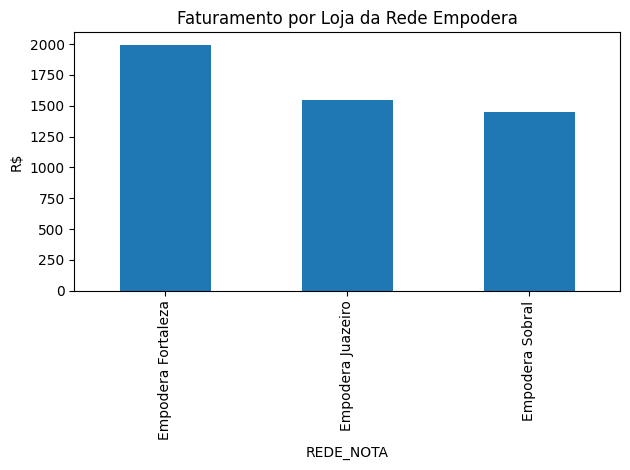

In [43]:
# Cálculo do total de vendas por loja
itens_completo['TOTAL'] = itens_completo['QUANTIDADE'] * itens_completo['PRECO']
faturamento_por_loja = itens_completo.groupby('REDE_NOTA')['TOTAL'].sum().sort_values(ascending=False)

# Visualização
faturamento_por_loja.plot(kind='bar', title='Faturamento por Loja da Rede Empodera', ylabel='R$')
plt.tight_layout()
plt.show()

# Análise de Segmentação de Clientes por Valor Comprado (RFM simplificado)

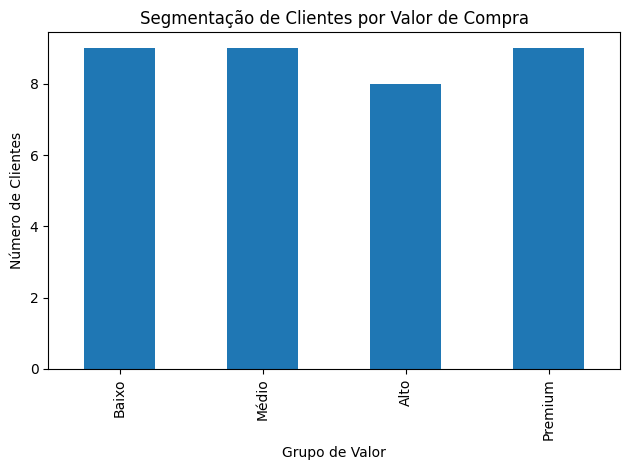

In [47]:
# Total comprado por cliente

clientes_gasto = itens_completo.groupby('CPF')['TOTAL'].sum().reset_index()
clientes_gasto = clientes_gasto.merge(clientes_df, on='CPF')
# Segmentação
clientes_gasto['GRUPO'] = pd.qcut(clientes_gasto['TOTAL'], q=4, labels=['Baixo', 'Médio', 'Alto', 'Premium'])

# Visualização
clientes_gasto['GRUPO'].value_counts().sort_index().plot(kind='bar', title='Segmentação de Clientes por Valor de Compra')
plt.xlabel('Grupo de Valor')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

# Desempenho dos Vendedores + Clusterização com K-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Total vendido e número de vendas por vendedor
vendas = notas_df.merge(vendedores_df, on='MATRICULA')
vendedores_perf = itens_completo.groupby('NOME_VENDEDOR')[['TOTAL']].agg(['sum', 'count'])
vendedores_perf.columns = ['TOTAL_VENDIDO', 'NUM_VENDAS']

# Clusterização
X = StandardScaler().fit_transform(vendedores_perf)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
vendedores_perf['CLUSTER'] = kmeans.labels_

# Visualização
import seaborn as sns
sns.scatterplot(data=vendedores_perf, x='NUM_VENDAS', y='TOTAL_VENDIDO', hue='CLUSTER', palette='Set2')
plt.title("Clusterização de Vendedores")
plt.tight_layout()
plt.show()



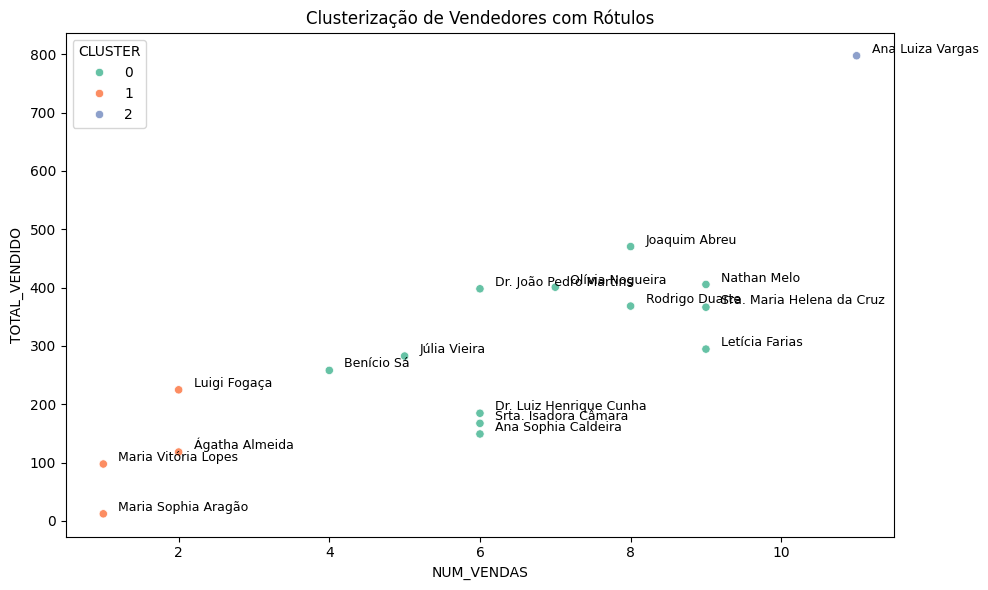

In [59]:
# Desempenho dos Vendedores + Clusterização com K-Means
plt.figure(figsize=(10, 6))
sns.scatterplot(data=vendedores_perf, x='NUM_VENDAS', y='TOTAL_VENDIDO', hue='CLUSTER', palette='Set2')

# Adiciona rótulos com o nome dos vendedores
for i, row in vendedores_perf.iterrows():
    plt.text(row['NUM_VENDAS'] + 0.2, row['TOTAL_VENDIDO'] + 5, str(i), fontsize=9)

plt.title("Clusterização de Vendedores com Rótulos")
plt.tight_layout()
plt.show()

## Interpretação do Gráfico de Clusterização
Eixos:
Eixo X – NUM_VENDAS: representa o número de vendas realizadas por cada vendedor.

Eixo Y – TOTAL_VENDIDO: representa o valor total vendido por cada vendedor.

Cores (hue = CLUSTER): representam os grupos de vendedores identificados pelo algoritmo K-Means, baseando-se nos dois eixos acima.

## Análise dos Clusters
 Cluster 0 (cor vermelha) – Baixo Desempenho
Vendedores com poucas vendas e baixo faturamento.

Exemplos:

Maria Sophia Aragão

Maria Vitória Lopes

Ágatha Almeida

## Interpretação:
Estes vendedores possivelmente enfrentam dificuldades de performance, seja por pouca experiência, baixa motivação ou problemas externos (ex: localização da loja, fluxo baixo de clientes).

## Cluster 1 (cor verde) – Desempenho Intermediário
Vendedores com quantidade de vendas moderada, mas total vendido razoável.

Exemplo:

Nathan Melo, Letícia Farias, Rodrigo Duarte

## Interpretação:
Estes vendedores apresentam desempenho estável. Estão no “meio do caminho” e podem ser estimulados com ações de capacitação ou metas para alcançarem alta performance.

## Cluster 2 (cor azul) – Alto Desempenho
Vendedores com muitas vendas e alto faturamento.

Exemplo:

Ana Luiza Vargas

## Interpretação:
Este cluster representa os top performers, com forte contribuição nas vendas. Devem ser analisados como modelo para replicar boas práticas com outros vendedores.

## Outras Percepções
Alguns vendedores com poucas vendas geraram faturamento considerável (vendas de produtos caros?).

Outros com muitas vendas geraram menos receita (produtos mais baratos ou desconto elevado?).

O nome dos vendedores no gráfico facilita entender individualmente quem precisa de suporte ou reconhecimento.